In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [3]:
import fiona
import os

In [7]:
os.environ["SHAPE_RESTORE_SHX"] = "YES"

In [16]:
df_urbanas = gpd.read_file('./ageb_urbanas/2023_1_00_A.shp')

In [17]:
df_rurales = gpd.read_file('./ageb_rurales/2023_1_00_AR.shp')

In [21]:
gdf_nacional = pd.concat([df_urbanas, df_rurales], ignore_index=True)

<Axes: >

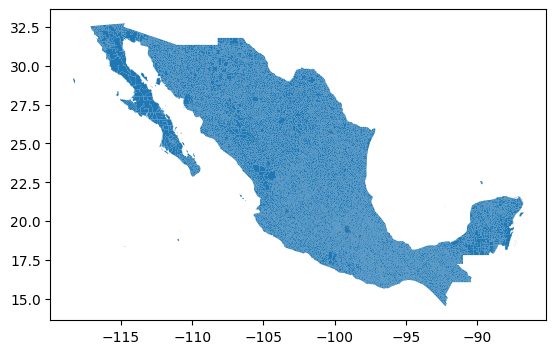

In [22]:
gdf_nacional.plot()

In [24]:
gdf_nacional.to_file("ageb_nacional.shp")

In [25]:
gdf_nacional.head()

,CVEGEO,CVE_ENT,CVE_MUN,CVE_LOC,CVE_AGEB,AMBITO,geometry
0,0100200590372,01,002,0059,0372,Urbana,"POLYGON ((-102.07947 22.08552, -102.0807 22.08..."
1,010020011025A,01,002,0011,025A,Urbana,"POLYGON ((-102.01512 22.19228, -102.01552 22.1..."
2,0100200010122,01,002,0001,0122,Urbana,"POLYGON ((-102.08767 22.23623, -102.08751 22.2..."
3,0100200590387,01,002,0059,0387,Urbana,"POLYGON ((-102.07481 22.08506, -102.07415 22.0..."
4,0100200110353,01,002,0011,0353,Urbana,"POLYGON ((-102.01394 22.1957, -102.01431 22.19..."


In [6]:
df_test = pd.read_csv('./ageb_censo/unzipped_files/ageb_mza_urbana_01_cpv2020/conjunto_de_datos/conjunto_de_datos_ageb_urbana_01_cpv2020.csv')

In [7]:
df_test

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,AGEB,MZA,POBTOT,POBFEM,...,VPH_TELEF,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC
0,1,Aguascalientes,0,Total de la entidad Aguascalientes,0,Total de la entidad,0000,0,1425607,728924,...,147818,359895,236003,174089,98724,70126,6021,15323,128996,1711
1,1,Aguascalientes,1,Aguascalientes,0,Total del municipio,0000,0,948990,486917,...,116647,251719,178619,130290,80951,56131,3299,7293,74227,731
2,1,Aguascalientes,1,Aguascalientes,1,Total de la localidad urbana,0000,0,863893,444725,...,112002,232793,169675,123670,77719,53589,2995,5984,63661,595
3,1,Aguascalientes,1,Aguascalientes,1,Total AGEB urbana,0017,0,2237,1137,...,11,625,189,352,46,74,15,23,391,*
4,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,0017,1,170,87,...,*,53,13,33,5,5,0,*,36,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16371,1,Aguascalientes,11,San Francisco de los Romo,138,La Ribera [Fraccionamiento],023A,40,152,82,...,0,37,5,3,0,*,0,10,40,0
16372,1,Aguascalientes,11,San Francisco de los Romo,138,La Ribera [Fraccionamiento],023A,41,148,70,...,*,33,6,4,0,0,*,5,31,*
16373,1,Aguascalientes,11,San Francisco de los Romo,138,La Ribera [Fraccionamiento],023A,42,162,89,...,5,44,16,19,*,4,*,*,28,0
16374,1,Aguascalientes,11,San Francisco de los Romo,138,La Ribera [Fraccionamiento],023A,43,195,98,...,0,50,21,23,*,6,3,5,32,*


In [4]:
import os

In [269]:
unzipped_files_dir = "./ageb_censo/unzipped_files"

In [270]:
dataframes = []

In [271]:
for root, dirs, files in os.walk(unzipped_files_dir):
    # Check if we are in a 'conjunto_de_datos' subdirectory
    if 'conjunto_de_datos' in root:
        for file in files:
            if file.endswith('.csv'):  # Only process .csv files
                try:
                    file_path = os.path.join(root, file)
                    # Read the CSV file into a DataFrame
                    df = pd.read_csv(file_path, encoding='latin-1')
                    df = df[df['NOM_LOC'].str.contains('Total AGEB')]
                    # Append the DataFrame to the list
                    dataframes.append(df)
                except Exception as e:
                    print(f"An error occurred while reading {file_path}: {e}")

/tmp/ipykernel_214534/2110000433.py:9: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding='latin-1')


In [272]:
len(dataframes)

32

In [273]:
agebs_df = pd.concat(dataframes, ignore_index=True)

In [274]:
del dataframes

In [331]:
agebs_df.head()

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,AGEB,MZA,POBTOT,POBFEM,...,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC,ubica_geo
0,06,Colima,001,ArmerÃ­a,1,Total AGEB urbana,0081,0,1389,708,...,371,182,194,54,16,22,44,240,8,06001
1,06,Colima,001,ArmerÃ­a,1,Total AGEB urbana,0109,0,1856,924,...,436,160,211,41,20,22,50,340,8,06001
2,06,Colima,001,ArmerÃ­a,1,Total AGEB urbana,0147,0,1078,497,...,268,140,125,21,14,16,18,148,7,06001
3,06,Colima,001,ArmerÃ­a,1,Total AGEB urbana,0151,0,1671,834,...,432,190,208,58,18,27,31,243,10,06001
4,06,Colima,001,ArmerÃ­a,1,Total AGEB urbana,0166,0,1463,714,...,327,98,127,18,6,21,49,274,10,06001


In [276]:
agebs_df = agebs_df.rename(columns={"ï»¿ENTIDAD": "ENTIDAD"})

In [277]:
agebs_df = agebs_df.reset_index(drop=True).iloc[:,:-1]

In [278]:
agebs_df['ENTIDAD'] = agebs_df['ENTIDAD'].astype(str).str.zfill(2)

In [279]:
agebs_df['ENTIDAD'] = agebs_df['ENTIDAD'].str.replace('.0', '')

In [280]:
agebs_df['ENTIDAD'] = agebs_df['ENTIDAD'].str.zfill(2)

In [281]:
agebs_df.loc[agebs_df['NOM_ENT'] == 'Jalisco','ENTIDAD'] = '14'

In [282]:
agebs_df['MUN'] = agebs_df['MUN'].astype(str).str.zfill(3)

In [283]:
agebs_df['ubica_geo'] = agebs_df['ENTIDAD'] + agebs_df['MUN']

In [285]:
agebs_df.head()

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,AGEB,MZA,POBTOT,POBFEM,...,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC,ubica_geo
0,06,Colima,001,ArmerÃ­a,1,Total AGEB urbana,0081,0,1389,708,...,371,182,194,54,16,22,44,240,8,06001
1,06,Colima,001,ArmerÃ­a,1,Total AGEB urbana,0109,0,1856,924,...,436,160,211,41,20,22,50,340,8,06001
2,06,Colima,001,ArmerÃ­a,1,Total AGEB urbana,0147,0,1078,497,...,268,140,125,21,14,16,18,148,7,06001
3,06,Colima,001,ArmerÃ­a,1,Total AGEB urbana,0151,0,1671,834,...,432,190,208,58,18,27,31,243,10,06001
4,06,Colima,001,ArmerÃ­a,1,Total AGEB urbana,0166,0,1463,714,...,327,98,127,18,6,21,49,274,10,06001


In [286]:
agebs_df[agebs_df['NOM_ENT']=='Jalisco']

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,AGEB,MZA,POBTOT,POBFEM,...,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC,ubica_geo
41958,14,Jalisco,001,Acatic,1,Total AGEB urbana,0067,0,1266,639.00,...,313.00,189,246,33,30,9,13,133,*,14001
41959,14,Jalisco,001,Acatic,1,Total AGEB urbana,0071,0,2073,"1,081.00",...,545.00,372,508,75,58,8,37,250,4,14001
41960,14,Jalisco,001,Acatic,1,Total AGEB urbana,0103,0,1112,578.00,...,264.00,122,119,27,29,6,12,139,*,14001
41961,14,Jalisco,001,Acatic,1,Total AGEB urbana,0118,0,725,356.00,...,195.00,82,129,19,13,6,11,123,*,14001
41962,14,Jalisco,001,Acatic,1,Total AGEB urbana,0122,0,1286,642.00,...,314.00,193,241,45,32,3,15,130,0,14001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46847,14,Jalisco,125,San Ignacio Cerro Gordo,1,Total AGEB urbana,0098,0,1061,583.00,...,268.00,157,239,23,9,4,21,141,3,14125
46848,14,Jalisco,125,San Ignacio Cerro Gordo,1,Total AGEB urbana,0100,0,1272,638.00,...,311.00,161,266,27,19,3,12,153,*,14125
46849,14,Jalisco,125,San Ignacio Cerro Gordo,1,Total AGEB urbana,0134,0,131,64.00,...,25.00,3,6,*,*,0,0,19,0,14125
46850,14,Jalisco,125,San Ignacio Cerro Gordo,1,Total AGEB urbana,0149,0,5,NaN,...,NaN,*,*,*,*,*,*,*,*,14125


In [298]:
agebs_df[agebs_df['ubica_geo'].str.contains('nan')]['NOM_ENT'].unique()

array([], dtype=object)

In [332]:
pdfs = pd.read_csv('../municipal_distributions/medicinas_pdf.csv')

In [333]:
pdfs

,ubica_geo,shape,loc,scale
0,10001,1.35,1.17,12.71
1,10004,9.26,1.63,1.88
2,10005,1.79,1.21,23.77
3,10006,1.68,2.95,11.44
4,10007,1.52,0.87,13.37
...,...,...,...,...
2471,32037,1.68,2.95,11.44
2472,32041,13.50,3.48,0.08
2473,32043,17.79,16.30,0.00
2474,32047,13.00,3.26,0.36


In [334]:
ageb_relevant = agebs_df[['POBTOT','ubica_geo','AGEB']]

In [335]:
pdfs

,ubica_geo,shape,loc,scale
0,10001,1.35,1.17,12.71
1,10004,9.26,1.63,1.88
2,10005,1.79,1.21,23.77
3,10006,1.68,2.95,11.44
4,10007,1.52,0.87,13.37
...,...,...,...,...
2471,32037,1.68,2.95,11.44
2472,32041,13.50,3.48,0.08
2473,32043,17.79,16.30,0.00
2474,32047,13.00,3.26,0.36


In [336]:
ageb_relevant

,POBTOT,ubica_geo,AGEB
0,1389,06001,0081
1,1856,06001,0109
2,1078,06001,0147
3,1671,06001,0151
4,1463,06001,0166
...,...,...,...
64308,512,16113,0113
64309,170,16113,0132
64310,23,16113,0147
64311,4,16113,0151


In [337]:
ageb_relevant[ageb_relevant['ubica_geo'].isin(pdfs['ubica_geo'])]

,POBTOT,ubica_geo,AGEB


In [338]:
ageb_relevant['ubica_geo'] = ageb_relevant['ubica_geo'].astype(str)
pdfs['ubica_geo'] = pdfs['ubica_geo'].astype(str)

/tmp/ipykernel_214534/2116034163.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ageb_relevant['ubica_geo'] = ageb_relevant['ubica_geo'].astype(str)


In [339]:
pdfs[pdfs['ubica_geo'].str.contains('6001')]

,ubica_geo,shape,loc,scale
992,6001,1.70,1.34,17.08
1450,16001,1.82,1.71,20.49
2196,26001,16.22,10.87,0.00


In [326]:
ageb_relevant.shape

(64313, 3)

In [340]:
ageb_relevant['ubica_geo'] = ageb_relevant['ubica_geo'].str.lstrip('0')

/tmp/ipykernel_214534/1841809341.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ageb_relevant['ubica_geo'] = ageb_relevant['ubica_geo'].str.lstrip('0')


In [341]:
ageb_relevant

,POBTOT,ubica_geo,AGEB
0,1389,6001,0081
1,1856,6001,0109
2,1078,6001,0147
3,1671,6001,0151
4,1463,6001,0166
...,...,...,...
64308,512,16113,0113
64309,170,16113,0132
64310,23,16113,0147
64311,4,16113,0151


In [342]:
pdfs[pdfs['ubica_geo'].str.startswith('14')]

,ubica_geo,shape,loc,scale
176,14002,11.44,0.98,0.46
177,14005,13.89,8.15,0.05
178,14006,12.90,3.67,0.20
179,14008,8.90,6.52,4.38
180,14010,15.39,1.09,0.00
...,...,...,...,...
1391,14117,10.76,3.26,1.18
1392,14118,13.28,1.30,0.35
1393,14119,10.34,2.04,1.35
1394,14122,17.93,1.96,0.00


In [343]:
merge_test = pd.merge(ageb_relevant, pdfs, on='ubica_geo', how='left')

In [344]:
merge_test.isnull().sum()

POBTOT        0
ubica_geo     0
AGEB          0
shape        13
loc          13
scale        13
dtype: int64

In [345]:
merge_test[merge_test['shape'].isna()]

,POBTOT,ubica_geo,AGEB,shape,loc,scale
5973,807,7033,008A,NaN,NaN,NaN
61436,2634,24056,0088,NaN,NaN,NaN
61437,1605,24056,0105,NaN,NaN,NaN
61438,3393,24056,011A,NaN,NaN,NaN
61439,24,24056,0124,NaN,NaN,NaN
61440,3,24056,0139,NaN,NaN,NaN
61441,88,24056,0143,NaN,NaN,NaN
61442,567,24056,0158,NaN,NaN,NaN
61443,79,24056,0162,NaN,NaN,NaN
61444,31,24056,0177,NaN,NaN,NaN


In [346]:
merge_test['shape'] = merge_test['shape'].fillna('1')
merge_test['loc'] = merge_test['loc'].fillna('0')
merge_test['scale'] = merge_test['scale'].fillna(3)

In [347]:
merge_test['shape'] = merge_test['shape'].astype(float)
merge_test['loc'] = merge_test['loc'].astype(float)

In [348]:
merge_test.to_csv('ageb_pdf.csv', index=False)

In [358]:
merge_test['shape'].describe()

count   64,313.00
mean         5.42
std          5.24
min          0.00
25%          1.55
50%          1.77
75%         10.12
max         20.46
Name: shape, dtype: float64

In [360]:
merge_test['scale'].describe()

count    64,313.00
mean        143.41
std       2,742.35
min           0.00
25%           0.95
50%          13.62
75%          22.37
max     102,736.54
Name: scale, dtype: float64

In [361]:
from tqdm import tqdm

# Number of Monte Carlo samples
n_samples = 10000

# Initialize an empty DataFrame to store results
results_df = pd.DataFrame()

# List to store potential problem rows
problematic_rows = []

# Loop through each AGEB
for idx, row in merge_test.iterrows():
    # Extract parameters of the log-normal distribution
    shape = row['shape']
    loc = row['loc']
    scale = row['scale']
    
    # Sample the log-normal distribution
    samples = np.random.lognormal(mean=loc, sigma=shape, size=n_samples) * scale
    
    # Multiply by the p    
    total_spending_samples = samples * row['POBTOT']
    
    # Calculate statistics: mean, 95% confidence interval (2.5th and 97.5th percentiles)
    mean_spending = np.mean(total_spending_samples)
    lower_bound = np.percentile(total_spending_samples, 2.5)
    upper_bound = np.percentile(total_spending_samples, 97.5)
    
    # If mean spending or upper bound seems too high, log this row
    if mean_spending > 3e6 or upper_bound > 1e7:  # Adjust threshold as needed
        samples = np.random.lognormal(mean=1.11, sigma=1.77, size=n_samples) * 13.62
        total_spending_samples = samples * row['POBTOT']

        mean_spending = np.mean(total_spending_samples)
        lower_bound = np.percentile(total_spending_samples, 2.5)
        upper_bound = np.percentile(total_spending_samples, 97.5)
    # Create a temporary DataFrame with the results for this AGEB
    temp_df = pd.DataFrame({
        'AGEB': [row['AGEB']],
        'mean_spending': [mean_spending],
        'lower_bound': [lower_bound],
        'upper_bound': [upper_bound]
    })
    
    # Concatenate the temporary DataFrame with the results DataFrame
    results_df = pd.concat([results_df, temp_df], ignore_index=True)

# Display problematic rows
problematic_df = pd.DataFrame(problematic_rows)

In [350]:
merge_test['POBTOT'].describe()

count   64,313.00
mean     1,560.19
std      1,783.81
min          0.00
25%        131.00
50%      1,047.00
75%      2,383.00
max     29,065.00
Name: POBTOT, dtype: float64

In [362]:
pd.options.display.float_format = '{:,.2f}'.format

In [363]:
results_df

,AGEB,mean_spending,lower_bound,upper_bound
0,0081,"409,794.37","3,190.32","2,336,301.24"
1,0109,"507,575.61","4,526.82","3,132,197.92"
2,0147,"283,764.28","2,561.15","1,808,805.92"
3,0151,"450,563.86","3,965.39","2,928,360.20"
4,0166,"413,163.66","3,356.95","2,803,697.50"
...,...,...,...,...
64308,0113,"100,752.97",663.41,"651,322.11"
64309,0132,"33,053.19",215.75,"225,119.66"
64310,0147,"4,605.64",30.74,"33,042.68"
64311,0151,768.82,4.86,"5,139.12"


In [364]:
results_df['mean_spending'].describe()

count      64,313.00
mean      289,941.74
std       358,114.28
min             0.00
25%        21,100.56
50%       159,331.28
75%       425,136.25
max     5,528,095.78
Name: mean_spending, dtype: float64

In [366]:
pdfs[pdfs['ubica_geo'] == '14120']

,ubica_geo,shape,loc,scale
216,14120,1.91,1.19,22.44


In [367]:
from scipy import stats

In [371]:
x = np.linspace(0, 10, 1000)

In [372]:
pdf = stats.lognorm.pdf(x, 1.91, scale=22.44, loc=1.19)

/tmp/ipykernel_214534/380446113.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


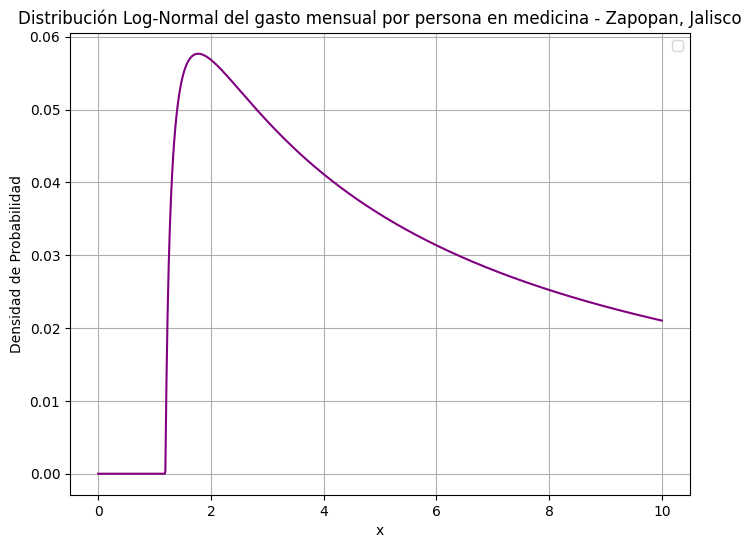

In [376]:
plt.figure(figsize=(8, 6))
plt.plot(x, pdf, color='purple')

# Labels and title
plt.title('Distribución Log-Normal del gasto mensual por persona en medicina - Zapopan, Jalisco')
plt.xlabel('x')
plt.ylabel('Densidad de Probabilidad')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()